In [31]:
import os
import cv2, matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
from generate import generate_images_from_outside, generate_w_from_seed
import torch

In [2]:
[np.random.randint(1,100) for _ in range(5)]

[37, 34, 51, 59, 55]

In [38]:
network_pkl = 'models/stylegan_human_v2_512.pkl'
seeds = [1000,1001,1002,1003]
outdir = '../exec/out/stylegan_human_generation/'
out_path = os.path.join(outdir, 'gan.png')
truncation_psi = 1.0
# 'const', 'random', or 'none'
noise_mode = 'const'

In [39]:
generate_images_from_outside(network_pkl, seeds, truncation_psi, noise_mode, outdir)

Loading networks from "models/stylegan_human_v2_512.pkl"...


['../exec/out/stylegan_human_generation/.DS_Store', '../exec/out/stylegan_human_generation/seed1003.png', '../exec/out/stylegan_human_generation/seed1002.png', '../exec/out/stylegan_human_generation/seed1000.png', '../exec/out/stylegan_human_generation/seed1001.png', '../exec/out/stylegan_human_generation/projected_w.npz']


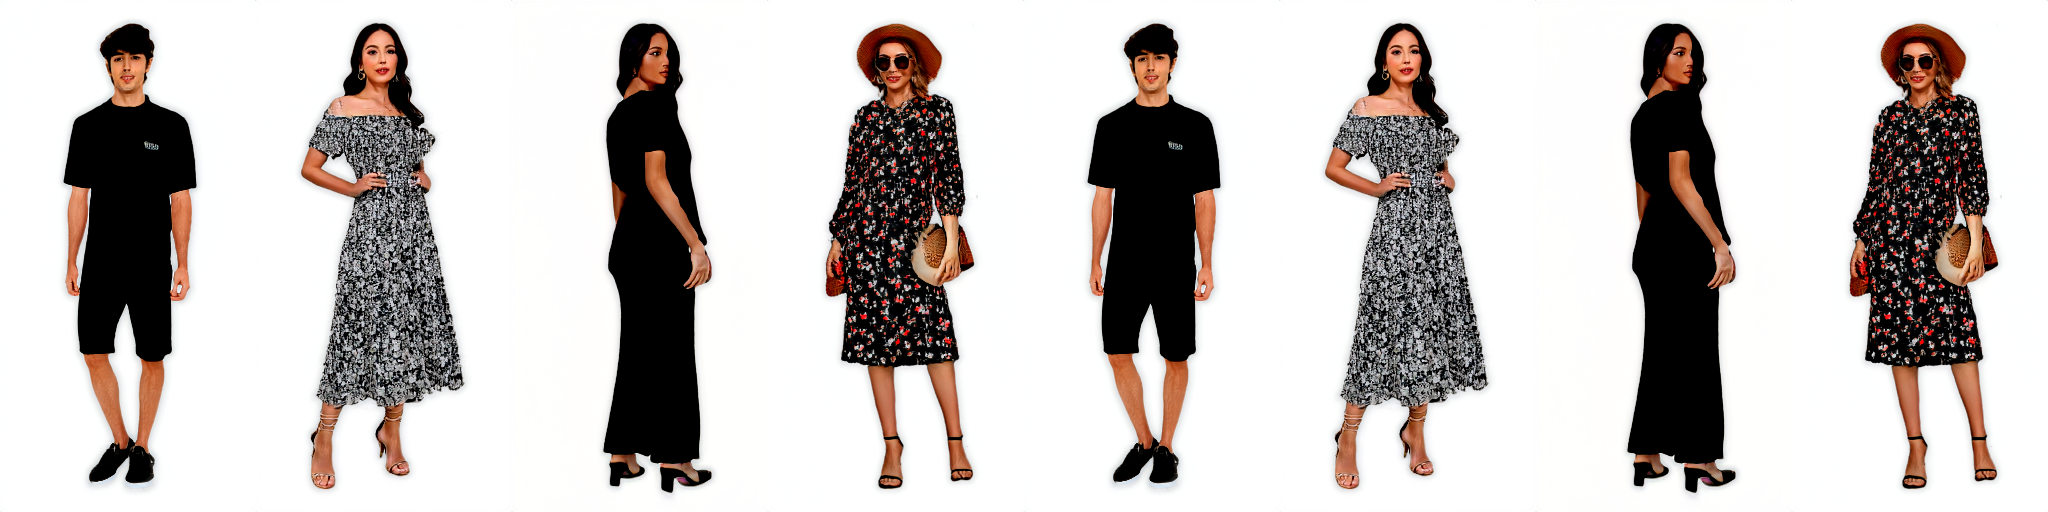

In [40]:
output_images = [os.path.join(outdir, x) for x in os.listdir(outdir)]
# sample_images = output_images[:3]
sample_images = output_images
print(sample_images)
for idx, image_path in enumerate(sample_images):
    if image_path.endswith('.png'):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if idx == 0:
            res = image
        else:
            res = np.concatenate([res, image], axis=1)

res = Image.fromarray(res)
res

In [41]:
w = generate_w_from_seed(network_pkl, seeds, truncation_psi, outdir)

Loading networks from "models/stylegan_human_v2_512.pkl"...


In [42]:
w.shape

torch.Size([1, 16, 512])

In [43]:
np.savez(os.path.join(outdir, 'projected_w.npz'), w=w.numpy())

In [44]:
nw = np.load('../exec/out/stylegan_human_generation/projected_w.npz')['w']

In [45]:
nw.shape

(1, 16, 512)

In [33]:
w

tensor([[[ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772],
         [ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772],
         [ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772],
         ...,
         [ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772],
         [ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772],
         [ 0.8112, -0.0114, -0.2592,  ..., -0.0820, -0.1254,  1.3772]]])